# NumPy, SciPy, Pandas, matplotlib, seaborn

In [3]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# Disclaimer

Няма да влизаме във всичко. Няма дори да чертаем пълна картинка – петте библиотеки са огромни и е добре да разгледате всяка от тях за детайли.

# NumPy

Най-важното нещо в NumPy е `np.array`, което е многомерен масив (тензор) с който може да извършваме стандартните операции.

In [4]:
array = np.array([[ 1,  2,  3],
                  [ 4,  5,  6],
                  [ 7,  8,  9],
                  [10, 11, 12]])
array

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

## Основи

Масивите имат следните атрибути:

* `ndim` – брой измерения
* `shape` – списък с размерности на всяко измерение
* `size` – брой елементи
* `dtype` – тип на елементите (всички елементи са от един тип)
* `itemsize` – брой байтове за един елемент

In [5]:
array.ndim

2

In [6]:
array.shape

(4, 3)

In [7]:
array.size

12

In [8]:
array.dtype

dtype('int32')

In [9]:
array.itemsize

4

In [10]:
array.dtype

dtype('int32')

NumPy ползва библиотеки на Fortran и C++ за да прави ефективни изчисления. По тази причина обектите му са по-ограничени от стандартни питонски масиви, но пък много по-ефективни.

## Индексация

Редове могат да се вземат с индексация:

In [11]:
array[0]

array([1, 2, 3])

In [12]:
array[-1]

array([10, 11, 12])

Елементи също:

In [13]:
array[1, 2]

6

In [14]:
array[1, :]

array([4, 5, 6])

In [15]:
array[:, 1]

array([ 2,  5,  8, 11])

In [16]:
array[:3, 1:]

array([[2, 3],
       [5, 6],
       [8, 9]])

## Промяна на формата

Може да промените формата на масива с `reshape`.

In [20]:
array.reshape(4, 3)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [21]:
array.reshape(2, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [22]:
array.reshape(12)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Аргумент от `-1` определя неясно измерение:

In [23]:
array.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [24]:
array.reshape(-1, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [25]:
array.reshape(-1, 1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

## Инициализация

Има `ones` и `zeros`, които инициализират масив с определени размери.

In [26]:
np.ones(4)

array([1., 1., 1., 1.])

In [27]:
np.zeros((4, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [28]:
np.ones((2, 3, 4))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

Има и още няколко подобни:

Единична матрица.

In [29]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Диагонална матрица:

In [30]:
np.diag([1, 2, 3, 4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Матрица с произволни стойности в $[0, 1)$:

In [31]:
np.random.rand(3, 4)

array([[0.77508953, 0.78061431, 0.04826613, 0.80232511],
       [0.09747821, 0.84639135, 0.74738386, 0.37319985],
       [0.45687593, 0.99022796, 0.04192616, 0.11248996]])

NumPy има няколко типа – може да ги определяте при конструкция:

In [32]:
np.ones((3, 4), dtype=np.bool)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [33]:
np.ones((3, 4), dtype=np.int8)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int8)

In [34]:
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## Операции

Може да мислите за елементите като матрици, но трябва да знаете, че операциите с тях се **прилагат  поелементно (elementwise)**:

In [36]:
i = np.eye(4)
i

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [37]:
random_numbers = np.random.rand(4, 4)
random_numbers

array([[0.56524832, 0.63693143, 0.85336076, 0.35430849],
       [0.06666811, 0.7677191 , 0.36192939, 0.83532735],
       [0.21346862, 0.74914068, 0.25611966, 0.66794091],
       [0.29118773, 0.68548169, 0.81428528, 0.89774562]])

Произведението на тези две матрици трябва да даде `random_numbers` (`i` е единична матрица). Резултата, обаче, е друг:

In [38]:
np.eye(4) * np.random.rand(4, 4)

array([[0.24713064, 0.        , 0.        , 0.        ],
       [0.        , 0.02342059, 0.        , 0.        ],
       [0.        , 0.        , 0.04572554, 0.        ],
       [0.        , 0.        , 0.        , 0.87955995]])

Събирането е същото:

In [39]:
i + random_numbers

array([[1.56524832, 0.63693143, 0.85336076, 0.35430849],
       [0.06666811, 1.7677191 , 0.36192939, 0.83532735],
       [0.21346862, 0.74914068, 1.25611966, 0.66794091],
       [0.29118773, 0.68548169, 0.81428528, 1.89774562]])

Както и повдигането на степен:

In [40]:
random_numbers ** i

array([[0.56524832, 1.        , 1.        , 1.        ],
       [1.        , 0.7677191 , 1.        , 1.        ],
       [1.        , 1.        , 0.25611966, 1.        ],
       [1.        , 1.        , 1.        , 0.89774562]])

Ако единия операнд е скалар, операцията се "векторизира" – изпълнява се за всеки елемент:

In [41]:
random_numbers + 1

array([[1.56524832, 1.63693143, 1.85336076, 1.35430849],
       [1.06666811, 1.7677191 , 1.36192939, 1.83532735],
       [1.21346862, 1.74914068, 1.25611966, 1.66794091],
       [1.29118773, 1.68548169, 1.81428528, 1.89774562]])

In [42]:
(random_numbers * 10).astype(np.int64)

array([[5, 6, 8, 3],
       [0, 7, 3, 8],
       [2, 7, 2, 6],
       [2, 6, 8, 8]], dtype=int64)

In [43]:
random_numbers - 0.5

array([[ 0.06524832,  0.13693143,  0.35336076, -0.14569151],
       [-0.43333189,  0.2677191 , -0.13807061,  0.33532735],
       [-0.28653138,  0.24914068, -0.24388034,  0.16794091],
       [-0.20881227,  0.18548169,  0.31428528,  0.39774562]])

Резултата може и да е друг тип:

In [44]:
random_numbers >= 0.5

array([[ True,  True,  True, False],
       [False,  True, False,  True],
       [False,  True, False,  True],
       [False,  True,  True,  True]])

## Индексация (2)

Може да индексираме с масиви и да вземем стойностите от няколко места:

In [45]:
numbers = (np.random.rand(12) * 100).astype(np.int64)
numbers

array([ 6, 44, 24, 80,  2, 66, 91, 35, 20, 30,  2, 35], dtype=int64)

In [46]:
print("numbers[2] = {}".format(numbers[2]))
print("numbers[4] = {}".format(numbers[4]))
print("numbers[6] = {}".format(numbers[6]))
numbers[[2, 4, 6]]

numbers[2] = 24
numbers[4] = 2
numbers[6] = 91


array([24,  2, 91], dtype=int64)

Може да индексираме и с булев масив:

In [47]:
random_numbers >= 0.5

array([[ True,  True,  True, False],
       [False,  True, False,  True],
       [False,  True, False,  True],
       [False,  True,  True,  True]])

In [48]:
random_numbers[random_numbers >= 0.5]

array([0.56524832, 0.63693143, 0.85336076, 0.7677191 , 0.83532735,
       0.74914068, 0.66794091, 0.68548169, 0.81428528, 0.89774562])

Като нещо допълнително, ако искаме да оставим числата по-малки от 0.5 да са нули, може да го направим така:

In [49]:
random_numbers * (random_numbers >= 0.5)

array([[0.56524832, 0.63693143, 0.85336076, 0.        ],
       [0.        , 0.7677191 , 0.        , 0.83532735],
       [0.        , 0.74914068, 0.        , 0.66794091],
       [0.        , 0.68548169, 0.81428528, 0.89774562]])

Това работи, защото `True` се брои за `1`, а `False` за `0`.

## Broadcasting

Ако единия операнд има по-малко измерения, операцията се прилага многократно за всеки елемент от другите измерения:

In [50]:
random_numbers + np.array([1, 2, 3, 4])

array([[1.56524832, 2.63693143, 3.85336076, 4.35430849],
       [1.06666811, 2.7677191 , 3.36192939, 4.83532735],
       [1.21346862, 2.74914068, 3.25611966, 4.66794091],
       [1.29118773, 2.68548169, 3.81428528, 4.89774562]])

In [51]:
random_numbers + np.array([[1], [2], [3], [4]])

array([[1.56524832, 1.63693143, 1.85336076, 1.35430849],
       [2.06666811, 2.7677191 , 2.36192939, 2.83532735],
       [3.21346862, 3.74914068, 3.25611966, 3.66794091],
       [4.29118773, 4.68548169, 4.81428528, 4.89774562]])

## Stacking

Може да "конкатенираме" масиви:

In [52]:
random_numbers = ((np.random.rand(3, 4) * 100) + 1).astype(np.int64)
random_numbers

array([[47, 56, 80, 68],
       [14, 50, 43, 19],
       [19, 89, 99, 64]], dtype=int64)

In [53]:
np.hstack([random_numbers, np.eye(3, dtype=np.int64)])

array([[47, 56, 80, 68,  1,  0,  0],
       [14, 50, 43, 19,  0,  1,  0],
       [19, 89, 99, 64,  0,  0,  1]], dtype=int64)

In [54]:
np.vstack([random_numbers, np.diag([1, 2, 3, 4])])

array([[47, 56, 80, 68],
       [14, 50, 43, 19],
       [19, 89, 99, 64],
       [ 1,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 0,  0,  3,  0],
       [ 0,  0,  0,  4]], dtype=int64)

## Разни други

`ravel` "разплита" масив:

In [55]:
tensor = np.random.rand(2, 3, 4)
tensor

array([[[0.9130901 , 0.39077131, 0.10627621, 0.28963591],
        [0.59687872, 0.06632285, 0.81747862, 0.03572893],
        [0.99032567, 0.57904764, 0.06418686, 0.58961472]],

       [[0.51495512, 0.09635442, 0.66974454, 0.33570031],
        [0.14452175, 0.63644686, 0.33447428, 0.41875459],
        [0.8184996 , 0.92010372, 0.0451755 , 0.79859888]]])

In [56]:
tensor.ravel()

array([0.9130901 , 0.39077131, 0.10627621, 0.28963591, 0.59687872,
       0.06632285, 0.81747862, 0.03572893, 0.99032567, 0.57904764,
       0.06418686, 0.58961472, 0.51495512, 0.09635442, 0.66974454,
       0.33570031, 0.14452175, 0.63644686, 0.33447428, 0.41875459,
       0.8184996 , 0.92010372, 0.0451755 , 0.79859888])

`np.arange` е аналогичен на `range` в Python:

In [57]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

`np.linspace` връща точки в линейно пространство:

In [58]:
np.linspace(10, 20, 5)

array([10. , 12.5, 15. , 17.5, 20. ])

In [59]:
np.linspace(0, 10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

Има и доста функции:

* `sum`
* `mean`
* `median`
* `max`
* `min`
* ...

Те приемат аргумент за измерение, по което да работят.

In [60]:
random_numbers

array([[47, 56, 80, 68],
       [14, 50, 43, 19],
       [19, 89, 99, 64]], dtype=int64)

In [61]:
random_numbers.sum()

648

In [62]:
random_numbers.sum(axis=0)

array([ 80, 195, 222, 151], dtype=int64)

In [63]:
random_numbers.sum(axis=1)

array([251, 126, 271], dtype=int64)

In [64]:
random_numbers.sum(0)

array([ 80, 195, 222, 151], dtype=int64)

In [65]:
random_numbers.max()

99

In [66]:
random_numbers.max(1)

array([80, 50, 99], dtype=int64)

In [67]:
random_numbers.mean()

54.0

In [68]:
random_numbers.mean(0)

array([26.66666667, 65.        , 74.        , 50.33333333])

## Universal Functions

NumPy предлага и функции, които се изпълняват поелементно върху масива.

In [70]:
numbers = np.random.rand(3, 3) * 3 + 1
numbers

array([[1.2499276 , 3.33677065, 1.66051608],
       [2.55234155, 2.75506183, 1.19569429],
       [1.78771688, 1.64389554, 2.9817728 ]])

In [71]:
np.exp(numbers)

array([[ 3.49009027, 28.12814413,  5.26202577],
       [12.83712735, 15.72201295,  3.30585219],
       [ 5.9757934 ,  5.17529087, 19.72275015]])

In [72]:
np.log(numbers)

array([[0.22308563, 1.20500347, 0.50712845],
       [0.93701119, 1.01343988, 0.17872701],
       [0.58093932, 0.49706876, 1.09251802]])

In [73]:
np.sin(numbers)

array([[ 0.94896179, -0.19394115,  0.99597788],
       [ 0.55573858,  0.37697746,  0.93047024],
       [ 0.97656485,  0.99732944,  0.15914036]])

Прилагането на функция на всеки елемент е малко тегаво:

In [74]:
def plus_one_square(x):
    return x**2 + 2 * x + 1

plus_one_square(3)

16

Има декоратор, `np.vectorize`, който прави функцията работеща:

In [75]:
vectorized = np.vectorize(plus_one_square)
vectorized(numbers)

array([[ 5.06217421, 18.80757963,  7.07834581],
       [12.61913046, 14.10048934,  4.8210734 ],
       [ 7.77136538,  6.99018365, 15.85451463]])

Разбира се, това е бавно. Ако можете, по-добре да си разпишете сметката:

In [76]:
numbers**2 + 2 * numbers + 1

array([[ 5.06217421, 18.80757963,  7.07834581],
       [12.61913046, 14.10048934,  4.8210734 ],
       [ 7.77136538,  6.99018365, 15.85451463]])

Или, донякъде изненадващо:

In [77]:
plus_one_square(numbers)

array([[ 5.06217421, 18.80757963,  7.07834581],
       [12.61913046, 14.10048934,  4.8210734 ],
       [ 7.77136538,  6.99018365, 15.85451463]])

Duck Typing FTW!

## Линейна алгебра

Има и разни познати неща от линейната алгебра.

In [78]:
matrix = np.arange(1, 10).reshape(3, 3)
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [79]:
matrix.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [80]:
matrix.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

В Python има оператор за умножение на матрици – `@`:

In [87]:
matrix @ np.eye(3)

array([[0.88723049, 0.14650949, 0.81907957],
       [0.8982236 , 0.46187128, 0.62042753],
       [0.12565343, 0.78138055, 0.79922849]])

In [88]:
np.diag([1, 2, 3]) @ matrix

array([[0.88723049, 0.14650949, 0.81907957],
       [1.79644721, 0.92374256, 1.24085506],
       [0.37696028, 2.34414165, 2.39768548]])

Може и да обръщате матрица:

In [89]:
matrix = np.random.rand(3, 3)
matrix

array([[0.05492946, 0.56555094, 0.65432742],
       [0.04178584, 0.84803115, 0.56760693],
       [0.04830675, 0.63932547, 0.32834623]])

In [90]:
inverse = np.linalg.inv(matrix)
inverse

array([[ 13.58532248, -37.42847942,  37.62922903],
       [ -2.2040582 ,   2.18370961,   0.61729658],
       [  2.2928471 ,   1.25461228,  -3.69244187]])

In [91]:
matrix @ inverse

array([[ 1.00000000e+00,  6.99305864e-17, -6.65553793e-17],
       [-2.58970714e-18,  1.00000000e+00,  8.23591913e-17],
       [ 2.27320444e-16,  1.42728303e-16,  1.00000000e+00]])

In [92]:
(matrix @ inverse).round(2)

array([[ 1.,  0., -0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

Разбира се, (1) тази операция не винаги минава и (2) е супер бавна.

## Още

В NumPy има още доста. Най-добре прегледайте документацията набързо:

* http://www.numpy.org/
* [Quickstart Tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
* https://google.com/

# SciPy

SciPy е огромен. Ето само някои от нещата, които има:

* Clustering package (`scipy.cluster`)
* Constants (`scipy.constants`)
* Discrete Fourier transforms (`scipy.fftpack`)
* Integration and ODEs (`scipy.integrate`)
* Interpolation (`scipy.interpolate`)
* Input and output (`scipy.io`)
* Linear algebra (`scipy.linalg`)
* Miscellaneous routines (`scipy.misc`)
* Multi-dimensional image processing (`scipy.ndimage`)
* Orthogonal distance regression (`scipy.odr`)
* Optimization and root finding (`scipy.optimize`)
* Signal processing (`scipy.signal`)
* Sparse matrices (`scipy.sparse`)
* Sparse linear algebra (`scipy.sparse.linalg`)
* Compressed Sparse Graph Routines (`scipy.sparse.csgraph`)
* Spatial algorithms and data structures (`scipy.spatial`)
* Special functions (`scipy.special`)
* Statistical functions (`scipy.stats`)
* Statistical functions for masked arrays (`scipy.stats.mstats`)

In [93]:
scipy.optimize.minimize(lambda x: x**2 + 2 * x + 1, 0.7123412)

      fun: 0.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-1.00000001])

Как? Сложно.

Като друго забавление, нека видим интеграцията:

In [94]:
from matplotlib.patches import Polygon

def draw_sine_integration_example():
    func = np.sin
    a, b = np.pi / 2, np.pi
    x = np.linspace(-0.2, np.pi * 1.5)
    y = func(x)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x, y, 'r', linewidth=2)
    plt.grid()

    ix = np.linspace(a, b)
    iy = func(ix)
    verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)

    ax.axhline(color='k')
    ax.axvline(color='k')
    ax.annotate(r'$\frac{\pi}{2}$', (np.pi / 2, 0), xytext=(0, -20), textcoords='offset points', size='x-large')
    ax.annotate(r'$\pi$', (np.pi, 0), xytext=(0, -20), textcoords='offset points', size='x-large')

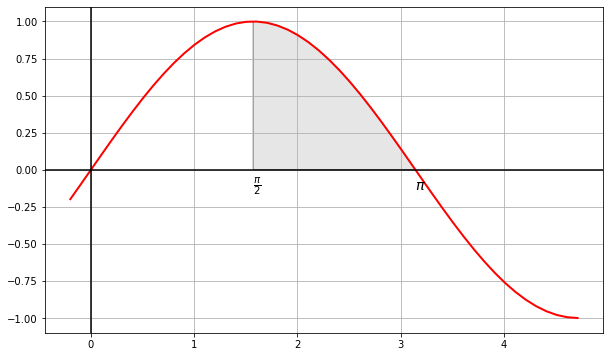

In [95]:
draw_sine_integration_example()

$$
\begin{align*}
\int_{\pi / 2}^{\pi}\sin(x)\mathrm{d} x &= - \cos(x) \Big|_{\pi / 2}^\pi \\
&= - \cos(\pi) - \big(- \cos(\frac{\pi}{2}) \big) \\
&= \cos(\frac{\pi}{2}) - \cos(\pi) \\
&= 0 - (-1) \\
&= 1
\end{align*} 
$$

In [96]:
scipy.integrate.quad(lambda x: np.sin(x), np.pi / 2, np.pi)

(0.9999999999999999, 1.1102230246251564e-14)

# Pandas

`pandas` е data science библиотека за Python. Дава ни два основни типа – `pd.Series` и `pd.DataFrame`.

* `pd.Series` е едноизмерен масив от стойности
* `pd.DataFrame` е таблица от данни. Може да мислите за нея като масив от `pd.Series`, където последните са всяка колона.

Ще разгледаме първо `pd.Series`.

In [97]:
series = pd.Series([2, 4, -1, 4])
series

0    2
1    4
2   -1
3    4
dtype: int64

Може да вземете стойностите като NumPy масив:

In [98]:
series.values

array([ 2,  4, -1,  4], dtype=int64)

Всеки `Series` има и иднекс:

In [99]:
series.index

RangeIndex(start=0, stop=4, step=1)

Индекса може да има произволни стойности:

In [100]:
series = pd.Series([2, 4, -1, 4], index=['a', 'b', 'c', 'd'])
series

a    2
b    4
c   -1
d    4
dtype: int64

In [101]:
series.index

Index(['a', 'b', 'c', 'd'], dtype='object')

Индексирането работи както очакваме:

In [102]:
series['a']

2

In [103]:
series['e'] = -12
series

a     2
b     4
c    -1
d     4
e   -12
dtype: int64

In [104]:
series[['a', 'e', 'c']]

a     2
e   -12
c    -1
dtype: int64

Има и позната векторизация от NumPy:

In [105]:
series * 2

a     4
b     8
c    -2
d     8
e   -24
dtype: int64

In [106]:
series > 0

a     True
b     True
c    False
d     True
e    False
dtype: bool

Както и индексиране с булев series. Обърнете внимание на съвпадащите и запазващите се индекси:

In [107]:
series[series > 0]

a    2
b    4
d    4
dtype: int64

Може да прекарете `Series` през универсална функция:

In [108]:
np.log(series * series)

a    1.386294
b    2.772589
c    0.000000
d    2.772589
e    4.969813
dtype: float64

Може да конструирате `Series` с речник, където ключовете са индекса, а стойностите са... стойностите.

In [109]:
capitals = {'Bulgaria': 'Sofia', 'United Kingdom': 'London', 'Malaysia': None}
series = pd.Series(capitals)
series

Bulgaria           Sofia
United Kingdom    London
Malaysia            None
dtype: object

Има `isnull`

In [110]:
series.isnull()

Bulgaria          False
United Kingdom    False
Malaysia           True
dtype: bool

Индекса и редицата могат да имат имена:

In [111]:
series.name = 'capital'
series.index.name = 'country'
series

country
Bulgaria           Sofia
United Kingdom    London
Malaysia            None
Name: capital, dtype: object

Това понякога е полезно за да се създадат ясни данни.

Има и основните статистически операции:

In [112]:
series = pd.Series([1, 5, 3, 2, 9, 1, 13, 5, 1, 5])

In [113]:
series.mean()

4.5

In [114]:
series.median()

4.0

In [115]:
series.mode()

0    1
1    5
dtype: int64

In [116]:
series.std()

3.92286743197994

In [117]:
series.var()

15.38888888888889

## DataFrame

DataFrame e таблица от данни, в която всяка колона има собствен тип.

Един начин да го конструираме е с речник, където всяка двойка ключ-стойност е колона.

In [118]:
pd.DataFrame({
'Name': ['John Snow', 'Arya Stark', 'Daenerys Targeryan', 'Jamie Lannister'],
'Gender': pd.Categorical(['male', 'female', 'female', 'male']),
'Age': [16, 11, 16, 36],
'Brothers': [3, 4, 2, 1],
'Sisters': [2, 1, 1, 1],
}, columns=['Name', 'Gender', 'Age', 'Brothers', 'Sisters'])

,Name,Gender,Age,Brothers,Sisters
0,John Snow,male,16,3,2
1,Arya Stark,female,11,4,1
2,Daenerys Targeryan,female,16,2,1
3,Jamie Lannister,male,36,1,1


`pd.Categorical` е нещо като `pd.Series`, но с по-оптимален запис в паметта.

In [119]:
pd.Categorical(['male', 'female', 'female', 'male'])

['male', 'female', 'female', 'male']
Categories (2, object): ['female', 'male']

Може да дадем данните и таблично, като определим имената на колоните:

In [120]:
data = [
    ['Eddard Stark', 34, 41, 'Stark', 'male'],
    ['Catelyn Stark', 33, 40, 'Stark', 'female'],
    ['Daenerys Targaryen', 13, 16, 'Targaryen', 'female'],
    ['Tyrion Lannister', 24, 32, 'Lannister', 'male'],
    ['Jon Snow', 14, 16, 'Stark', 'male'],
    ['Brandon Stark', 7, 10, 'Stark', 'male'],
    ['Sansa Stark', 11, 13, 'Stark', 'female'],
    ['Arya Stark', 9, 11, 'Stark', 'female'],
    ['Theon Greyjoy', 18, 16, 'Greyjoy', 'male'],
    ['Davos Seaworth', 37, 49, 'Seaworth', 'male'],
    ['Jaime Lannister', 31, 36, 'Lannister', 'male'],
    ['Samwell Tarly', 14, 17, 'Tarly', 'male'],
    ['Cersei Lannister', 31, 36, 'Lannister', 'female'],
    ['Brienne of Tarth', 17, 32, 'Tarth', 'female']
]
characters = pd.DataFrame(data, columns=['name', 'book_age', 'tv_age', 'house', 'gender'])

In [121]:
characters

,name,book_age,tv_age,house,gender
0,Eddard Stark,34,41,Stark,male
1,Catelyn Stark,33,40,Stark,female
2,Daenerys Targaryen,13,16,Targaryen,female
3,Tyrion Lannister,24,32,Lannister,male
4,Jon Snow,14,16,Stark,male
5,Brandon Stark,7,10,Stark,male
6,Sansa Stark,11,13,Stark,female
7,Arya Stark,9,11,Stark,female
8,Theon Greyjoy,18,16,Greyjoy,male
9,Davos Seaworth,37,49,Seaworth,male


Индексирането взема колони (като series):

In [122]:
characters['name']

0           Eddard Stark
1          Catelyn Stark
2     Daenerys Targaryen
3       Tyrion Lannister
4               Jon Snow
5          Brandon Stark
6            Sansa Stark
7             Arya Stark
8          Theon Greyjoy
9         Davos Seaworth
10       Jaime Lannister
11         Samwell Tarly
12      Cersei Lannister
13      Brienne of Tarth
Name: name, dtype: object

In [123]:
characters.name

0           Eddard Stark
1          Catelyn Stark
2     Daenerys Targaryen
3       Tyrion Lannister
4               Jon Snow
5          Brandon Stark
6            Sansa Stark
7             Arya Stark
8          Theon Greyjoy
9         Davos Seaworth
10       Jaime Lannister
11         Samwell Tarly
12      Cersei Lannister
13      Brienne of Tarth
Name: name, dtype: object

In [124]:
characters[['name', 'tv_age']]

,name,tv_age
0,Eddard Stark,41
1,Catelyn Stark,40
2,Daenerys Targaryen,16
3,Tyrion Lannister,32
4,Jon Snow,16
5,Brandon Stark,10
6,Sansa Stark,13
7,Arya Stark,11
8,Theon Greyjoy,16
9,Davos Seaworth,49


Ако искаме да индексираме по редове, трябва да ползваме `loc`:

In [125]:
characters.loc[3]

name        Tyrion Lannister
book_age                  24
tv_age                    32
house              Lannister
gender                  male
Name: 3, dtype: object

Обърнете внимание, че резултате е `Series` от реда. Индекса е имената на колоните, а типа е най-генералния (`object`).

Може да вземете slice:

In [126]:
characters.loc[1:5]

,name,book_age,tv_age,house,gender
1,Catelyn Stark,33,40,Stark,female
2,Daenerys Targaryen,13,16,Targaryen,female
3,Tyrion Lannister,24,32,Lannister,male
4,Jon Snow,14,16,Stark,male
5,Brandon Stark,7,10,Stark,male


Може да комбинираме редове и колони с `loc`:

In [127]:
characters.loc[1:5, ['name', 'gender']]

,name,gender
1,Catelyn Stark,female
2,Daenerys Targaryen,female
3,Tyrion Lannister,male
4,Jon Snow,male
5,Brandon Stark,male


Бихме могли дори да преименуваме индекса:

In [128]:
characters.index = ['ned', 'cat', 'dany', 'tyrion', 'jon', 'bran', 'sansa', 'arya', 'theon', 'davos', 'jaime',
                    'sam', 'cersei', 'brienne']
characters

,name,book_age,tv_age,house,gender
ned,Eddard Stark,34,41,Stark,male
cat,Catelyn Stark,33,40,Stark,female
dany,Daenerys Targaryen,13,16,Targaryen,female
tyrion,Tyrion Lannister,24,32,Lannister,male
jon,Jon Snow,14,16,Stark,male
bran,Brandon Stark,7,10,Stark,male
sansa,Sansa Stark,11,13,Stark,female
arya,Arya Stark,9,11,Stark,female
theon,Theon Greyjoy,18,16,Greyjoy,male
davos,Davos Seaworth,37,49,Seaworth,male


Тогава индексацията става другояче:

In [129]:
subset = ['ned', 'cat', 'jaime']
columns = ['name', 'house', 'gender']
characters.loc[subset, columns]

,name,house,gender
ned,Eddard Stark,Stark,male
cat,Catelyn Stark,Stark,female
jaime,Jaime Lannister,Lannister,male


Може да правите стандартната векторна математика с колоните:

In [130]:
differences = characters.tv_age - characters.book_age
differences

ned         7
cat         7
dany        3
tyrion      8
jon         2
bran        3
sansa       2
arya        2
theon      -2
davos      12
jaime       5
sam         3
cersei      5
brienne    15
dtype: int64

Виждаме, че средно персонажите са по-възрастни в сериала:

In [131]:
differences.mean()

5.142857142857143

In [132]:
differences.median()

4.0

Може да добавим колоната в DataFrame-а. Отново, обърнете внимание на съвпадащите индекси:

In [133]:
characters['age_difference'] = characters.tv_age - characters.book_age
characters

,name,book_age,tv_age,house,gender,age_difference
ned,Eddard Stark,34,41,Stark,male,7
cat,Catelyn Stark,33,40,Stark,female,7
dany,Daenerys Targaryen,13,16,Targaryen,female,3
tyrion,Tyrion Lannister,24,32,Lannister,male,8
jon,Jon Snow,14,16,Stark,male,2
bran,Brandon Stark,7,10,Stark,male,3
sansa,Sansa Stark,11,13,Stark,female,2
arya,Arya Stark,9,11,Stark,female,2
theon,Theon Greyjoy,18,16,Greyjoy,male,-2
davos,Davos Seaworth,37,49,Seaworth,male,12


Ако добавим нова колона с разминаващ се индекс, останалите стойности ще се попълнят като празни. Липсващите индекси ще се игнорират:

In [134]:
alive = pd.Series([False, True, False], index=['ned', 'dany', 'viserys'])
characters['alive'] = alive
characters

,name,book_age,tv_age,house,gender,age_difference,alive
ned,Eddard Stark,34,41,Stark,male,7,False
cat,Catelyn Stark,33,40,Stark,female,7,NaN
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True
tyrion,Tyrion Lannister,24,32,Lannister,male,8,NaN
jon,Jon Snow,14,16,Stark,male,2,NaN
bran,Brandon Stark,7,10,Stark,male,3,NaN
sansa,Sansa Stark,11,13,Stark,female,2,NaN
arya,Arya Stark,9,11,Stark,female,2,NaN
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,NaN
davos,Davos Seaworth,37,49,Seaworth,male,12,NaN


Бележка: спойлерите са от първи сезон. Ако не сте го гледали – къде живеете?

Друга модификация:

In [135]:
characters['underage_tv'] = characters.tv_age < 18
characters

,name,book_age,tv_age,house,gender,age_difference,alive,underage_tv
ned,Eddard Stark,34,41,Stark,male,7,False,False
cat,Catelyn Stark,33,40,Stark,female,7,NaN,False
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True,True
tyrion,Tyrion Lannister,24,32,Lannister,male,8,NaN,False
jon,Jon Snow,14,16,Stark,male,2,NaN,True
bran,Brandon Stark,7,10,Stark,male,3,NaN,True
sansa,Sansa Stark,11,13,Stark,female,2,NaN,True
arya,Arya Stark,9,11,Stark,female,2,NaN,True
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,NaN,True
davos,Davos Seaworth,37,49,Seaworth,male,12,NaN,False


Може да попълним липсващите стойности с `fillna`. Това вече сме го виждали:

In [136]:
characters.alive = characters.alive.fillna(True)
characters

,name,book_age,tv_age,house,gender,age_difference,alive,underage_tv
ned,Eddard Stark,34,41,Stark,male,7,False,False
cat,Catelyn Stark,33,40,Stark,female,7,True,False
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True,True
tyrion,Tyrion Lannister,24,32,Lannister,male,8,True,False
jon,Jon Snow,14,16,Stark,male,2,True,True
bran,Brandon Stark,7,10,Stark,male,3,True,True
sansa,Sansa Stark,11,13,Stark,female,2,True,True
arya,Arya Stark,9,11,Stark,female,2,True,True
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,True,True
davos,Davos Seaworth,37,49,Seaworth,male,12,True,False


Spoiler alert: не всички са живи

Може да вземем и NumPy матрицата:

In [137]:
characters.values

array([['Eddard Stark', 34, 41, 'Stark', 'male', 7, False, False],
       ['Catelyn Stark', 33, 40, 'Stark', 'female', 7, True, False],
       ['Daenerys Targaryen', 13, 16, 'Targaryen', 'female', 3, True,
        True],
       ['Tyrion Lannister', 24, 32, 'Lannister', 'male', 8, True, False],
       ['Jon Snow', 14, 16, 'Stark', 'male', 2, True, True],
       ['Brandon Stark', 7, 10, 'Stark', 'male', 3, True, True],
       ['Sansa Stark', 11, 13, 'Stark', 'female', 2, True, True],
       ['Arya Stark', 9, 11, 'Stark', 'female', 2, True, True],
       ['Theon Greyjoy', 18, 16, 'Greyjoy', 'male', -2, True, True],
       ['Davos Seaworth', 37, 49, 'Seaworth', 'male', 12, True, False],
       ['Jaime Lannister', 31, 36, 'Lannister', 'male', 5, True, False],
       ['Samwell Tarly', 14, 17, 'Tarly', 'male', 3, True, True],
       ['Cersei Lannister', 31, 36, 'Lannister', 'female', 5, True,
        False],
       ['Brienne of Tarth', 17, 32, 'Tarth', 'female', 15, True, False]],
      dtype

Може да махате колони и редове с `drop`:

In [138]:
characters.drop(['ned', 'cat', 'sansa', 'arya', 'bran'])

,name,book_age,tv_age,house,gender,age_difference,alive,underage_tv
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True,True
tyrion,Tyrion Lannister,24,32,Lannister,male,8,True,False
jon,Jon Snow,14,16,Stark,male,2,True,True
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,True,True
davos,Davos Seaworth,37,49,Seaworth,male,12,True,False
jaime,Jaime Lannister,31,36,Lannister,male,5,True,False
sam,Samwell Tarly,14,17,Tarly,male,3,True,True
cersei,Cersei Lannister,31,36,Lannister,female,5,True,False
brienne,Brienne of Tarth,17,32,Tarth,female,15,True,False


In [139]:
characters.drop(['tv_age', 'book_age', 'age_difference'], axis=1)

,name,house,gender,alive,underage_tv
ned,Eddard Stark,Stark,male,False,False
cat,Catelyn Stark,Stark,female,True,False
dany,Daenerys Targaryen,Targaryen,female,True,True
tyrion,Tyrion Lannister,Lannister,male,True,False
jon,Jon Snow,Stark,male,True,True
bran,Brandon Stark,Stark,male,True,True
sansa,Sansa Stark,Stark,female,True,True
arya,Arya Stark,Stark,female,True,True
theon,Theon Greyjoy,Greyjoy,male,True,True
davos,Davos Seaworth,Seaworth,male,True,False


И разбира се, индексацията също върши работа за това:

In [140]:
characters.house == 'Stark'

ned         True
cat         True
dany       False
tyrion     False
jon         True
bran        True
sansa       True
arya        True
theon      False
davos      False
jaime      False
sam        False
cersei     False
brienne    False
Name: house, dtype: bool

In [141]:
~(characters.house == 'Stark')

ned        False
cat        False
dany        True
tyrion      True
jon        False
bran       False
sansa      False
arya       False
theon       True
davos       True
jaime       True
sam         True
cersei      True
brienne     True
Name: house, dtype: bool

In [142]:
characters[~(characters.house == 'Stark')]

,name,book_age,tv_age,house,gender,age_difference,alive,underage_tv
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True,True
tyrion,Tyrion Lannister,24,32,Lannister,male,8,True,False
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,True,True
davos,Davos Seaworth,37,49,Seaworth,male,12,True,False
jaime,Jaime Lannister,31,36,Lannister,male,5,True,False
sam,Samwell Tarly,14,17,Tarly,male,3,True,True
cersei,Cersei Lannister,31,36,Lannister,female,5,True,False
brienne,Brienne of Tarth,17,32,Tarth,female,15,True,False


Има и `rank`, който връща ранка при сортиране. `method` взема няколко стойности, които определят какво да стане със елементите, които са еднакви:

In [143]:
characters.tv_age.rank(method='min')

ned        13.0
cat        12.0
dany        4.0
tyrion      8.0
jon         4.0
bran        1.0
sansa       3.0
arya        2.0
theon       4.0
davos      14.0
jaime      10.0
sam         7.0
cersei     10.0
brienne     8.0
Name: tv_age, dtype: float64

In [144]:
characters['age_rank'] = characters.tv_age.rank(method='min')
characters

,name,book_age,tv_age,house,gender,age_difference,alive,underage_tv,age_rank
ned,Eddard Stark,34,41,Stark,male,7,False,False,13.0
cat,Catelyn Stark,33,40,Stark,female,7,True,False,12.0
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True,True,4.0
tyrion,Tyrion Lannister,24,32,Lannister,male,8,True,False,8.0
jon,Jon Snow,14,16,Stark,male,2,True,True,4.0
bran,Brandon Stark,7,10,Stark,male,3,True,True,1.0
sansa,Sansa Stark,11,13,Stark,female,2,True,True,3.0
arya,Arya Stark,9,11,Stark,female,2,True,True,2.0
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,True,True,4.0
davos,Davos Seaworth,37,49,Seaworth,male,12,True,False,14.0


In [145]:
characters.sort_values(by='age_rank')

,name,book_age,tv_age,house,gender,age_difference,alive,underage_tv,age_rank
bran,Brandon Stark,7,10,Stark,male,3,True,True,1.0
arya,Arya Stark,9,11,Stark,female,2,True,True,2.0
sansa,Sansa Stark,11,13,Stark,female,2,True,True,3.0
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True,True,4.0
jon,Jon Snow,14,16,Stark,male,2,True,True,4.0
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,True,True,4.0
sam,Samwell Tarly,14,17,Tarly,male,3,True,True,7.0
tyrion,Tyrion Lannister,24,32,Lannister,male,8,True,False,8.0
brienne,Brienne of Tarth,17,32,Tarth,female,15,True,False,8.0
jaime,Jaime Lannister,31,36,Lannister,male,5,True,False,10.0


## Агрегиращи операции

In [146]:
characters.sum()

name              Eddard StarkCatelyn StarkDaenerys TargaryenTyr...
book_age                                                        293
tv_age                                                          365
house             StarkStarkTargaryenLannisterStarkStarkStarkSta...
gender            malefemalefemalemalemalemalefemalefemalemalema...
age_difference                                                   72
alive                                                            13
underage_tv                                                       7
age_rank                                                      100.0
dtype: object

In [147]:
characters.sum(axis=1)

<ipython-input-147-61c7c60d8f9d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  characters.sum(axis=1)


ned         95.0
cat         93.0
dany        38.0
tyrion      73.0
jon         38.0
bran        23.0
sansa       31.0
arya        26.0
theon       38.0
davos      113.0
jaime       83.0
sam         43.0
cersei      83.0
brienne     73.0
dtype: float64

In [148]:
characters.describe()

,book_age,tv_age,age_difference,age_rank
count,14.000000,14.000000,14.000000,14.000000
mean,20.928571,26.071429,5.142857,7.142857
std,10.395741,13.164429,4.417746,4.240050
min,7.000000,10.000000,-2.000000,1.000000
25%,13.250000,16.000000,2.250000,4.000000
50%,17.500000,24.500000,4.000000,7.500000
75%,31.000000,36.000000,7.000000,10.000000
max,37.000000,49.000000,15.000000,14.000000


In [149]:
characters.tv_age.value_counts()

16    3
32    2
36    2
41    1
40    1
10    1
13    1
11    1
49    1
17    1
Name: tv_age, dtype: int64

## Йерархични индекси

Поддържат се и йерархични индекси:

In [150]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1   -0.536293
   2    0.692436
   3    3.010390
b  1    0.415270
   3   -0.617138
c  1   -0.093435
   2   -0.878513
d  2    0.981280
   3    0.506411
dtype: float64

Индекс обекта е малко по-особен:

In [151]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

Индексиране на редица с йерархичен индекс връща редицата на вложения индекс:

In [152]:
data['b']

1    0.415270
3   -0.617138
dtype: float64

`unstack` обръща йерархичния индекс до измерение на таблицата:

In [153]:
data.unstack()

,1,2,3
a,-0.536293,0.692436,3.010390
b,0.415270,NaN,-0.617138
c,-0.093435,-0.878513,NaN
d,NaN,0.981280,0.506411


`stack` е обратната операция:

In [154]:
data.unstack().stack()

a  1   -0.536293
   2    0.692436
   3    3.010390
b  1    0.415270
   3   -0.617138
c  1   -0.093435
   2   -0.878513
d  2    0.981280
   3    0.506411
dtype: float64

`DataFrame`-а също може да има йерархични индекси по всички измерения:

In [155]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

Индексацията на колона връща друг `DataFrame`:

In [156]:
frame['Ohio']

Green  Red
a 1      0    1
  2      3    4
b 1      6    7
  2      9   10

Може да дадем имена на индексите:

In [157]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

`swaplevel` ни позволява да разменим реда на индексите:

In [158]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

Ако сортираме след това, нещата ще изглеждат както очакваме:

In [159]:
frame.swaplevel('key1', 'key2').sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

## Join

Има и операции, подобни на join-овете в базите от данни:

In [160]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})

df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [161]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [162]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


merge прави стандартен join (декартово произведение на редовете):

In [163]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


По подразбиране се ползват съвпадащите колони. Може да го направим експлицитно:

In [164]:
pd.merge(df1, df2, on=['key'])

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


По подразбиране се прави inner join – ако някой ключ го няма в един от двата `DataFrame`-а, няма да го има и в резултата. outer join-а запази реда, попълвайки стойностите с `NaN`:

In [165]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


# Matplotlib

Следва кратък и непълен пример в matplotlib.

`plot` чертае функция:

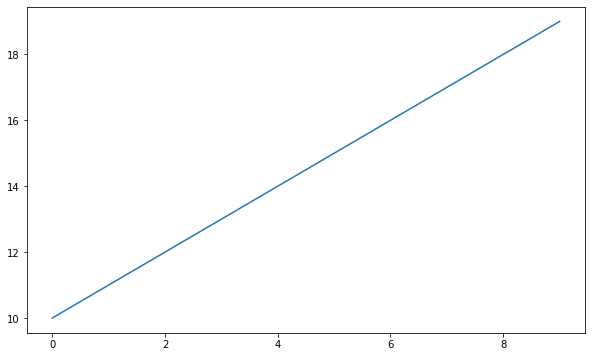

In [166]:
plt.figure(figsize=(10, 6))
data = np.arange(10, 20)
plt.plot(data);

`plot` приема два аргумента – $x$ и $f(x)$:

In [167]:
xs = np.arange(10)
ys = 2 ** xs

In [168]:
xs

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [169]:
ys

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32)

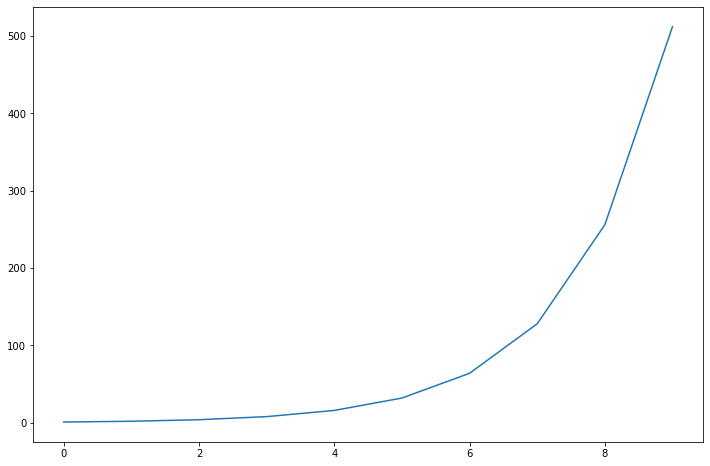

In [170]:
plt.figure(figsize=(12, 8))
plt.plot(xs, ys);

Тая функция е малко ръбата, затова е по-добре да ползваме `linspace`:

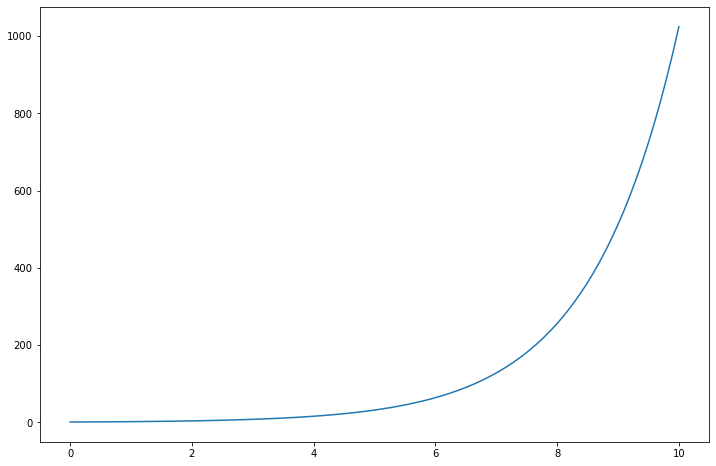

In [171]:
xs = np.linspace(0, 10, 100)
ys = 2 ** xs
plt.figure(figsize=(12, 8))
plt.plot(xs, ys);

`scatter` пък рисува точки:

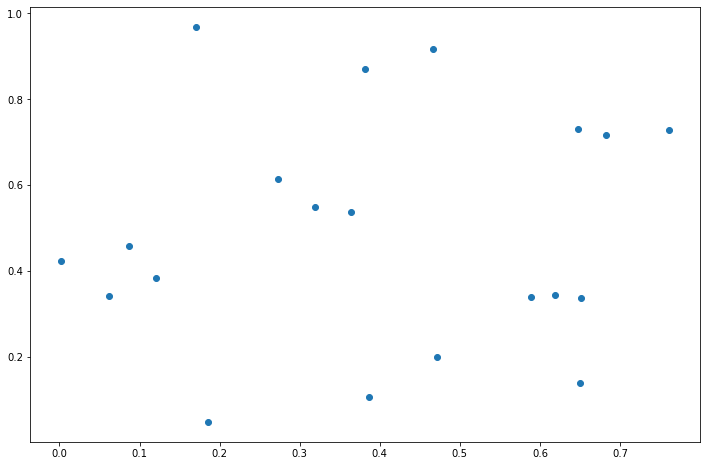

In [172]:
points = np.random.rand(20, 2)
plt.figure(figsize=(12, 8))
plt.scatter(points[:, 0], points[:, 1]);

In [173]:
points

array([[0.08623714, 0.45902794],
       [0.61830794, 0.34465818],
       [0.170652  , 0.96923305],
       [0.46682514, 0.91624551],
       [0.27346357, 0.61508715],
       [0.65192077, 0.33620325],
       [0.68206266, 0.71672035],
       [0.00141955, 0.42356973],
       [0.76165913, 0.72947832],
       [0.18501625, 0.04775876],
       [0.38204119, 0.87148493],
       [0.36443459, 0.53650038],
       [0.65005774, 0.13801253],
       [0.64729571, 0.73023849],
       [0.58905856, 0.33896628],
       [0.31938224, 0.54859029],
       [0.11997301, 0.38392526],
       [0.38668314, 0.10513744],
       [0.47137635, 0.19940042],
       [0.06208503, 0.34048899]])

In [174]:
points[:, 0]

array([0.08623714, 0.61830794, 0.170652  , 0.46682514, 0.27346357,
       0.65192077, 0.68206266, 0.00141955, 0.76165913, 0.18501625,
       0.38204119, 0.36443459, 0.65005774, 0.64729571, 0.58905856,
       0.31938224, 0.11997301, 0.38668314, 0.47137635, 0.06208503])

Настройките по подразбиране могат да се променят с `rc`:

In [175]:
plt.rc('figure', figsize=(12, 8))

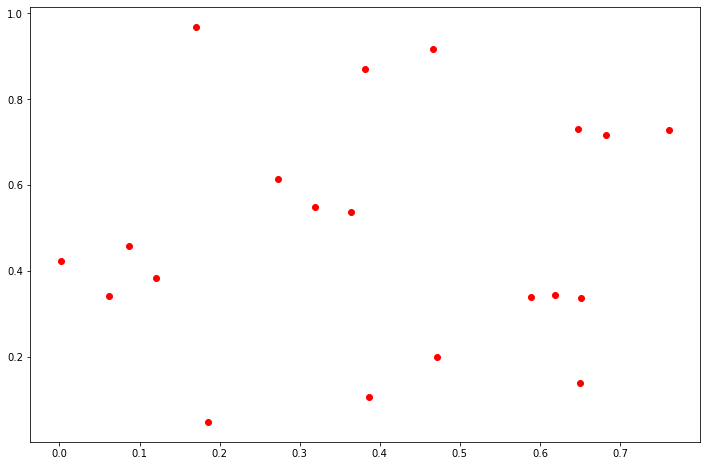

In [176]:
plt.scatter(points[:, 0], points[:, 1], color="red");

Повечето може да подавате цветове и стил:

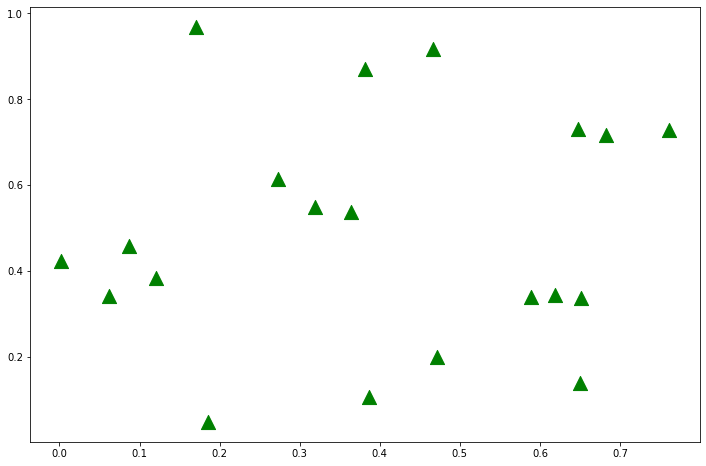

In [177]:
plt.scatter(points[:, 0], points[:, 1], marker='^', color='green', s=200);

Има и къс запис:

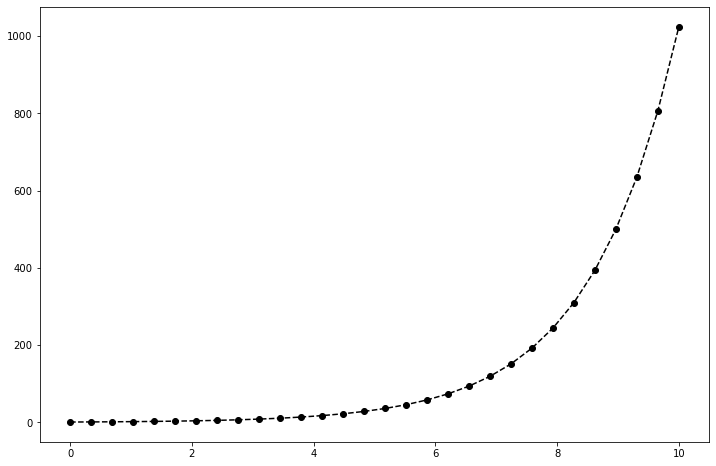

In [178]:
xs = np.linspace(0, 10, 30)
ys = 2 ** xs
plt.plot(xs, ys, 'ko--');

Може да нарисувате много неща наведнъж. При `%matplotlib inline` всички неща от една клетка ще се начертаят в една фигура.

In [179]:
a = np.random.rand(10, 2)
b = np.random.rand(10, 2)
c = np.random.rand(10, 2)

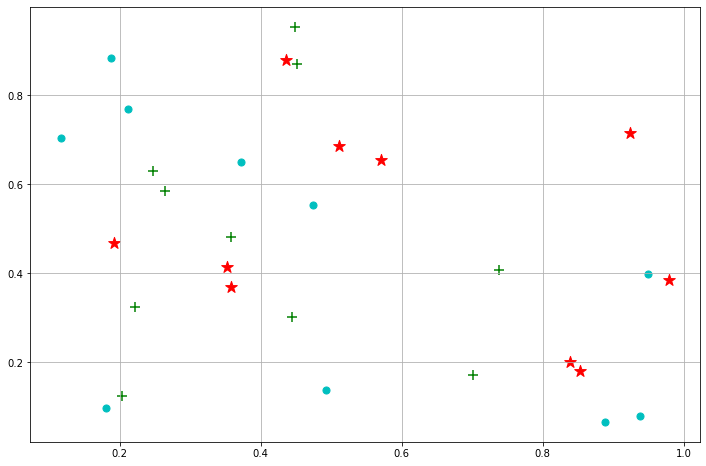

In [180]:
plt.scatter(a[:, 0], a[:, 1], marker='+', c='g', s=100)
plt.scatter(b[:, 0], b[:, 1], marker='*', c='r', s=150)
plt.scatter(c[:, 0], c[:, 1], marker='o', c='c', s=50)
plt.grid();

Може да чертаем и хистограми:

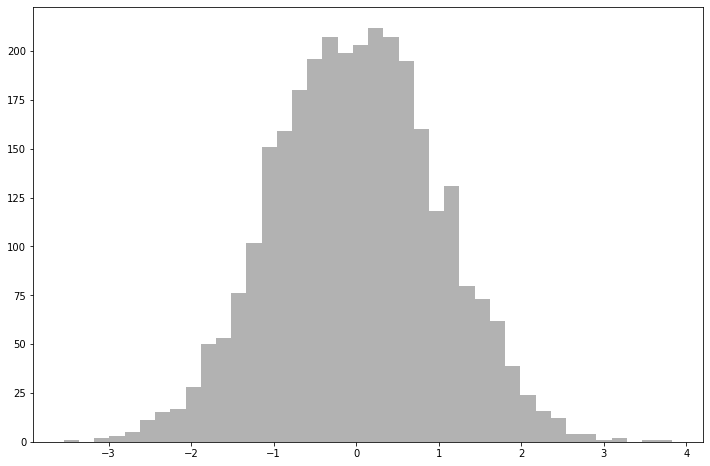

In [181]:
plt.hist(np.random.randn(3000), bins=40, color='k', alpha=0.3);

Може да съпоставим и хистограмата с едно нормално разпределение:

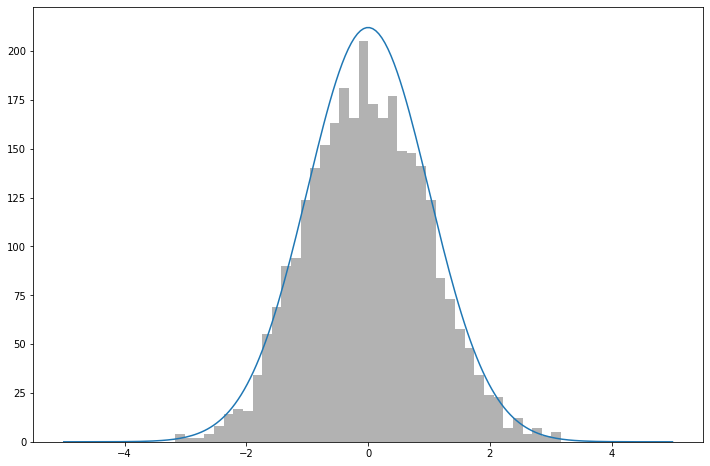

In [182]:
xs = np.linspace(-5, 5, 200)
ys = (1 / np.sqrt(2)) * np.exp(- xs ** 2 / 2)
plt.hist(np.random.randn(3000), bins=40, color='k', alpha=0.3)
plt.plot(xs, ys * 300);

Една фигура може да съдържа други subplot-ове:

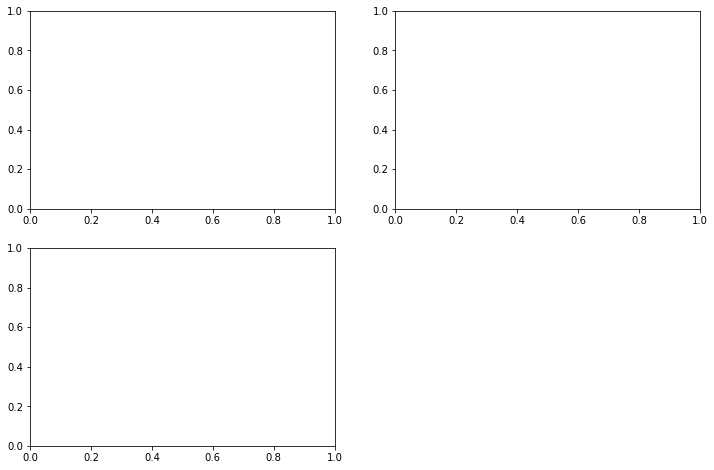

In [183]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Първите два аргумента (`2, 2`) са колко subplot-а да има хоризонтално и вертикално. Третия е индекса, който искаме да създадем:

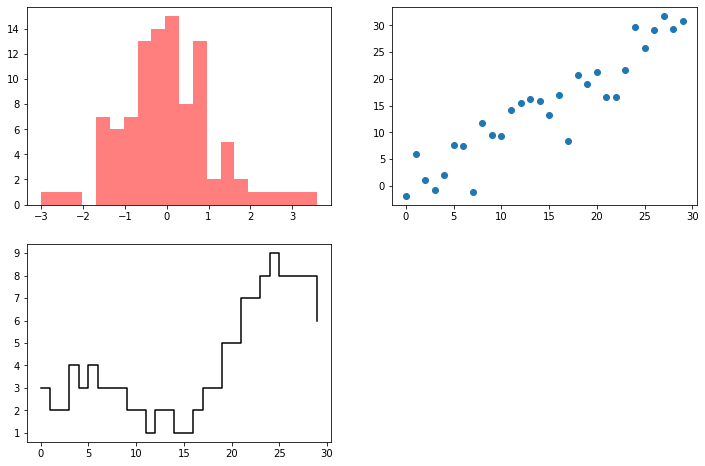

In [184]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.randn(100), bins=20, color='r', alpha=0.5)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(30).round().cumsum(), 'k-', drawstyle='steps-post');

За последно, нека видим и примера с интеграцията от по-рано:

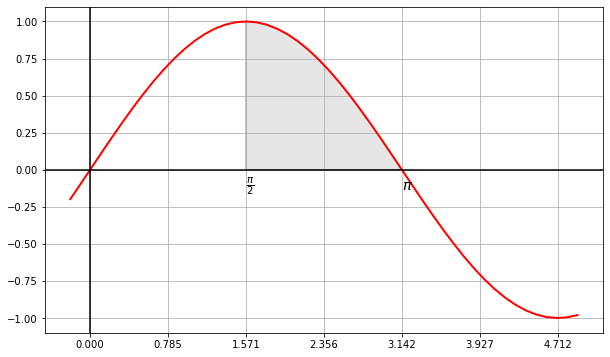

In [185]:
func = np.sin
a, b = np.pi / 2, np.pi
x = np.linspace(-0.2, np.pi * 1.5 + 0.2)
y = func(x)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'r', linewidth=2)
plt.grid()

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.xaxis.set_ticks(np.arange(0, 5, np.pi / 4))

ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.annotate(r'$\frac{\pi}{2}$', (np.pi / 2, 0), xytext=(0, -20), textcoords='offset points', size='x-large')
ax.annotate(r'$\pi$', (np.pi, 0), xytext=(0, -20), textcoords='offset points', size='x-large');

От тук нататък, най-добрия начин да научите повече за matplotlib е да гледате примери и да ровите из документацията. Обикновено имате конкретен проблем, който искате да решите, и това работи най-добре.

Освен ако не искате да налеете 20-40 часа да разберете всичко в детайли, което също не е лошо.

# Seaborn

Тази библиотека дава интерфейс от по-високо ниво за чертане на диаграми. Също, има интеграция с pandas.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


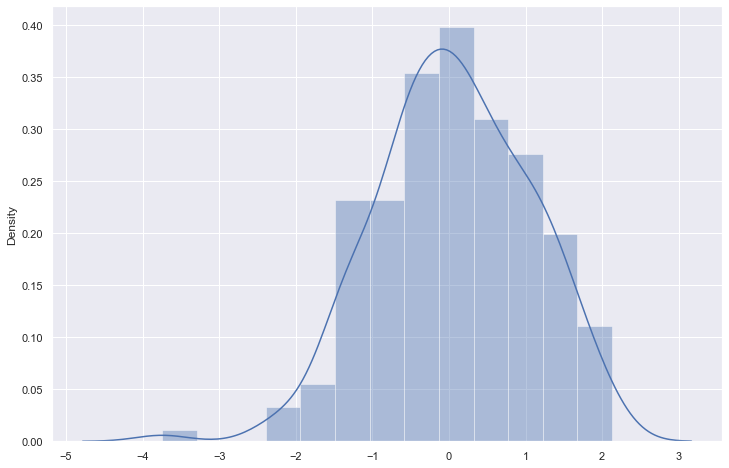

In [207]:
x = np.random.normal(size=200)
sns.distplot(x);

Обърнете внимание как сами си избра bins и си начерта дистрибуцията с крива.

In [208]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,2.185485,1.884539
1,-0.449304,1.053486
2,-0.536043,1.245274
3,0.182516,1.700464
4,-0.906606,1.324835


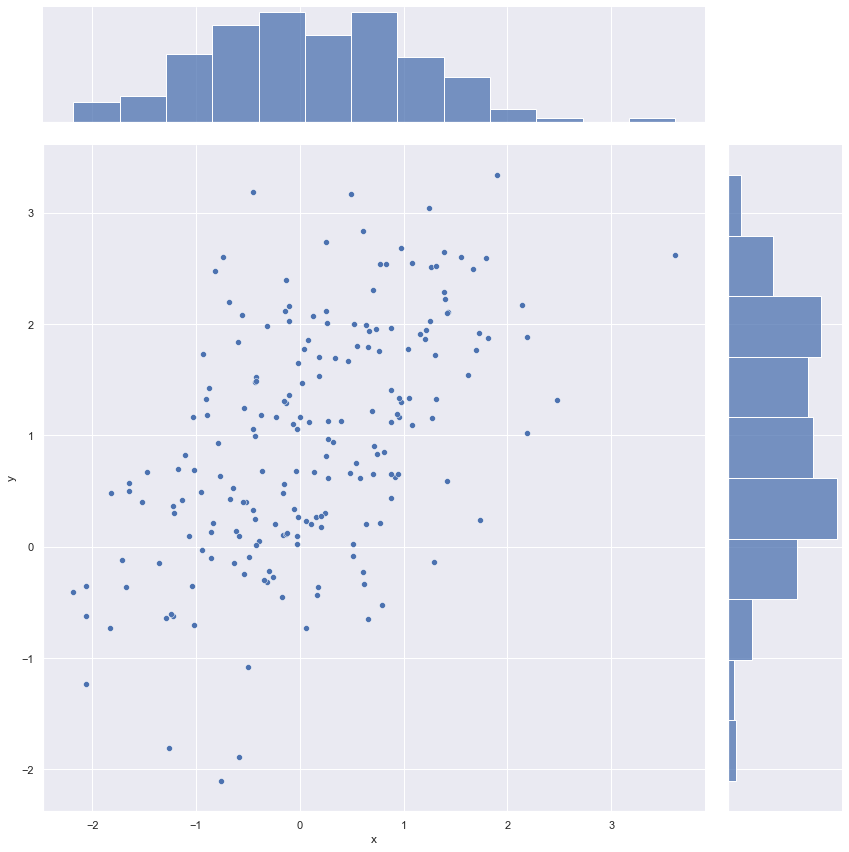

In [209]:
sns.jointplot(x="x", y="y", data=df, height=12);

Seaborn има собствени идеи за добре изглеждащи диаграми. Може да ги включите така:

In [210]:
sns.set()

Вече нещата ще изглеждат малко по-различно:

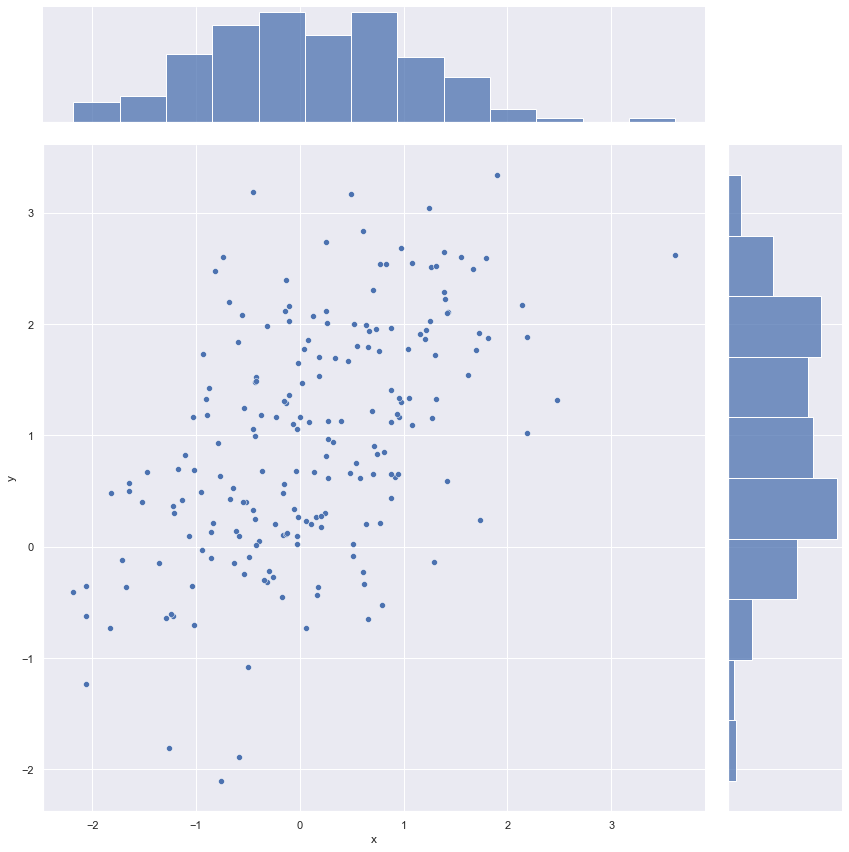

In [211]:
sns.jointplot(x="x", y="y", data=df, height=12);

## Pairplot

Pairplot-а е много удобен начин да разглеждате зависимости между характеристики. За това е подходящ едно от стандартните множества от данни, iris. Има го в sklearn, но ще го вземем през seaborn, където е в по-добра форма:

In [212]:
iris = sns.load_dataset("iris")

In [213]:
iris.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species
51,6.4,3.2,4.5,1.5,versicolor
112,6.8,3.0,5.5,2.1,virginica
115,6.4,3.2,5.3,2.3,virginica
9,4.9,3.1,1.5,0.1,setosa
116,6.5,3.0,5.5,1.8,virginica
145,6.7,3.0,5.2,2.3,virginica
130,7.4,2.8,6.1,1.9,virginica
27,5.2,3.5,1.5,0.2,setosa
122,7.7,2.8,6.7,2.0,virginica
149,5.9,3.0,5.1,1.8,virginica


Това са категориите:

In [214]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Ето това са характеристиките:

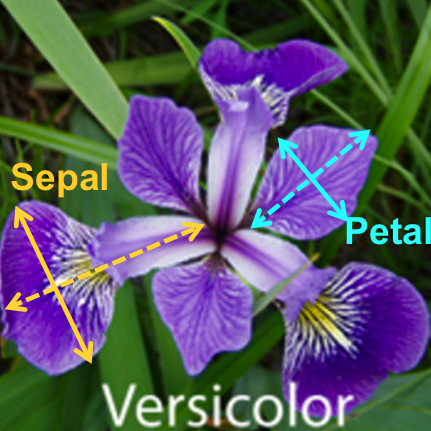

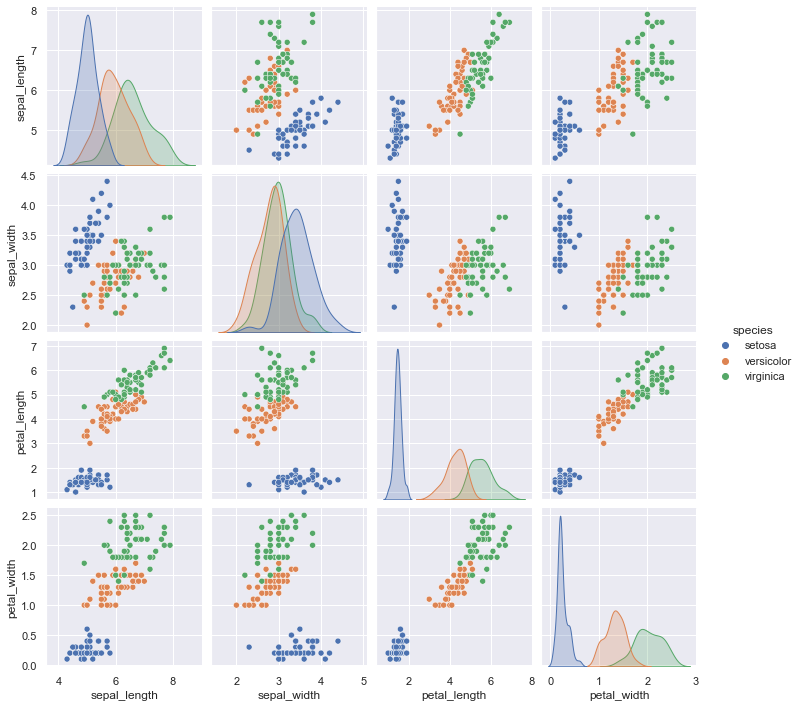

In [215]:
sns.pairplot(iris, hue="species");

Да вземем два други две множества от данни от seaborn:

In [216]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")

Единия вече го познавате:

In [217]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Другия е за бакшиши:

In [218]:
tips.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Има boxplot, който показва разпределението по квартили. Повече информация за boxplot - [тук](https://www.simplypsychology.org/boxplots.html).

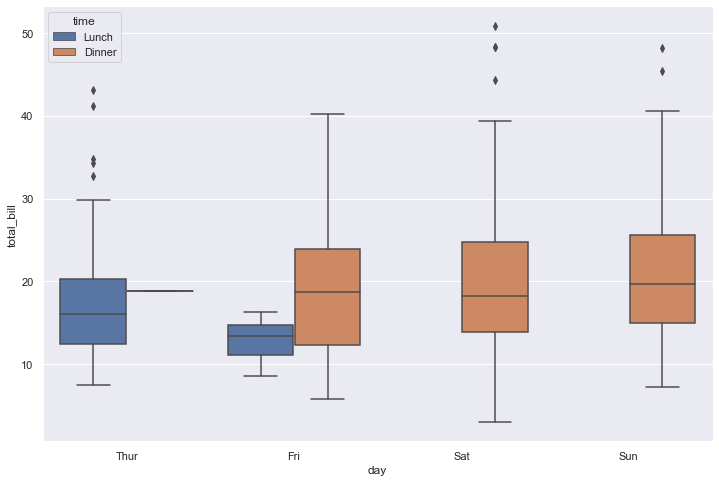

In [219]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

barplot е ясен:

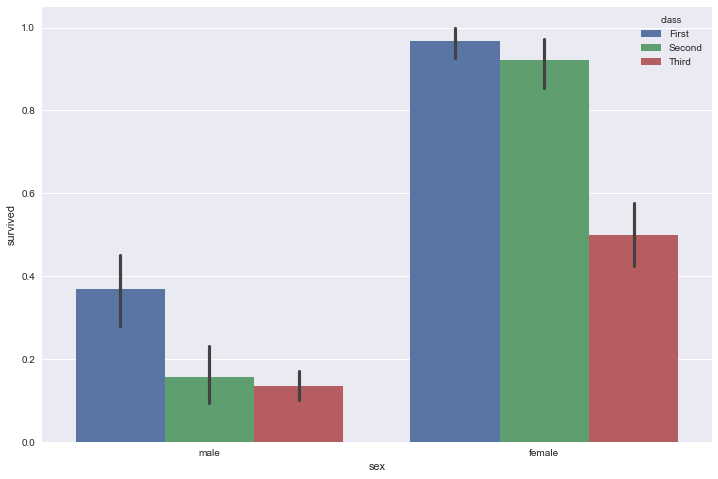

In [186]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

`regplot` чертае линейни зависимости:

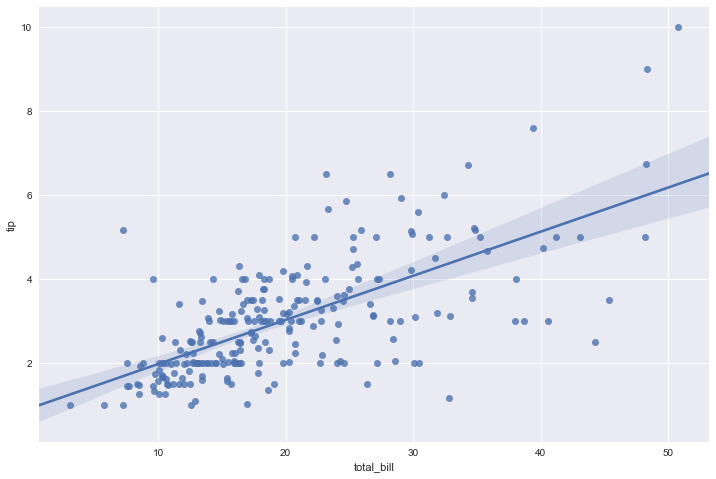

In [187]:
sns.regplot(x="total_bill", y="tip", data=tips);

Повече детайли има в [tutorial страницата на seaborn](https://seaborn.pydata.org/tutorial.html).

## Интеграция с pandas

И накрая, `pandas` има няколко метода, които работят директно със seaborn.

In [220]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-1.676343,0.474898,-0.083129,-0.157949
10,-0.439631,1.570158,1.547707,-0.585499
20,-1.939348,2.381874,0.561599,0.806515
30,-1.243976,2.568094,-1.208401,0.513478
40,-1.511367,3.964870,-1.305171,1.050749
50,-2.528640,5.380041,-0.038576,0.388532
60,-3.000268,5.843301,-0.070004,0.978855
70,-3.121659,4.463200,-0.238826,1.856564
80,-4.360669,4.351930,0.277581,0.726205
90,-4.645879,5.918692,1.210852,0.126766


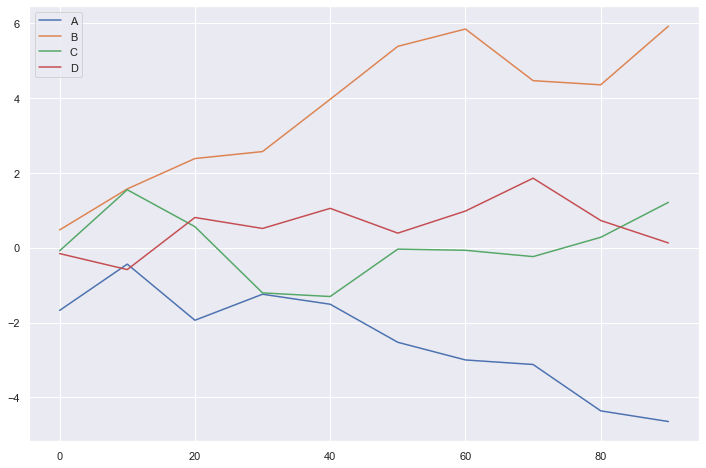

In [221]:
df.plot();

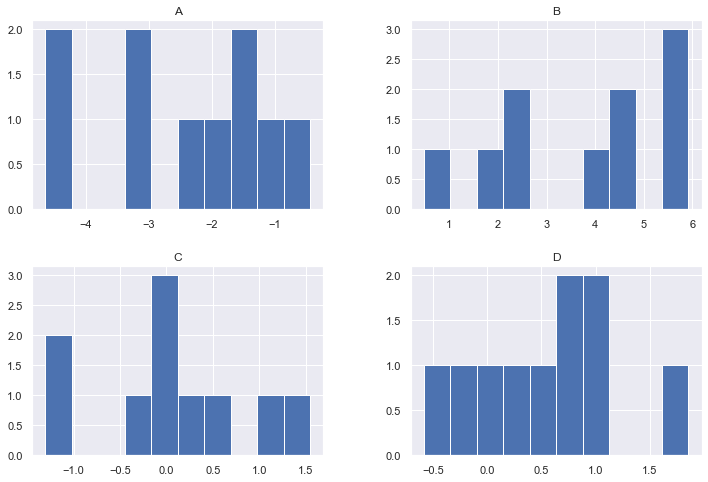

In [224]:
df.hist();

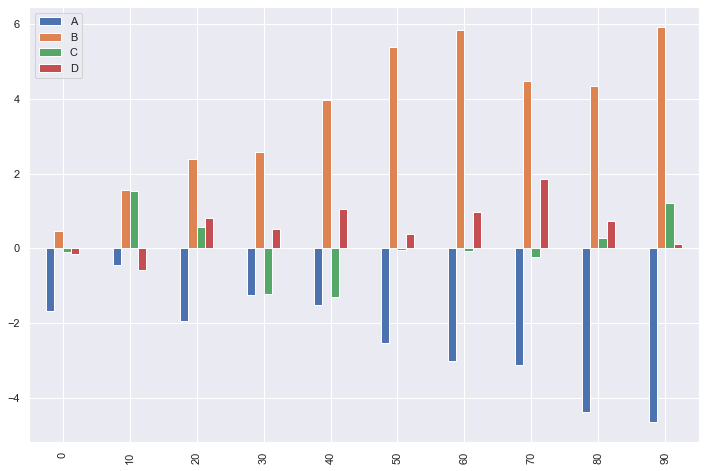

In [225]:
df.plot.bar();

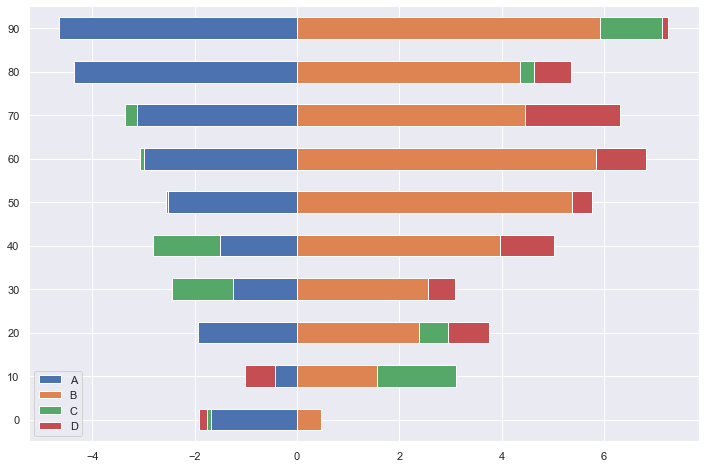

In [226]:
df.plot.barh(stacked=True);

Това може да се комбинира със ванила matplotlib:

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


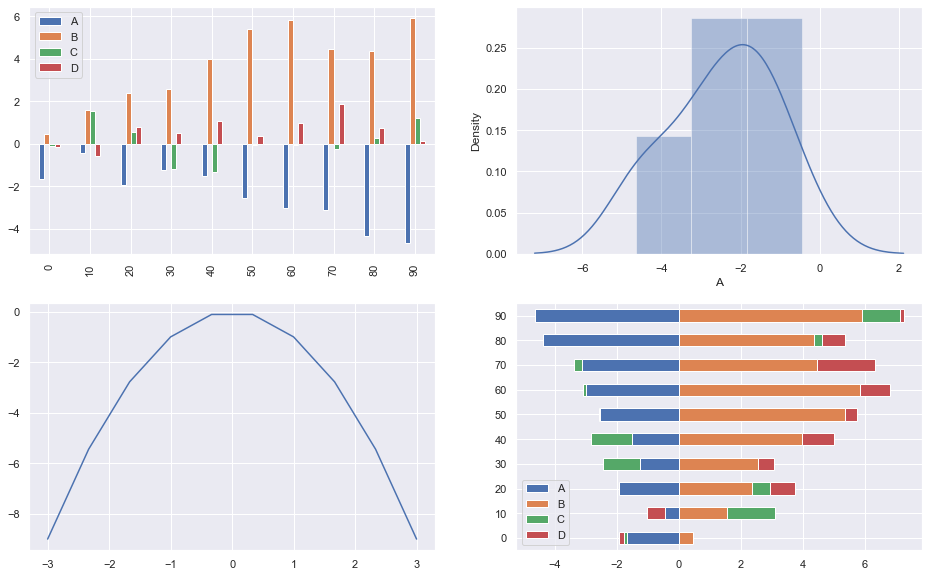

In [227]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()
df.plot.bar(ax=axes[0])
sns.distplot(df.A, ax=axes[1])
axes[2].plot(np.linspace(-3, 3, 10), -np.linspace(-3, 3, 10) ** 2)
df.plot.barh(stacked=True, ax=axes[3]);

Seabonr има още много възможности, над които няма да се спираме в момента: 
* Легенди
* Оси
* Рисуване на точки
* И други.

# Въпроси?